## Case Study:-You've just joined Podha as a Data Analyst. In your first team meeting, the company's founder explains: "Due to a crunch of funds, we've decided to stick to just one marketing campaign to optimize our budget and increase our runway.Your mission is to identify the most effective campaign and determine the best acquisition strategies to maximize customer acquisition and conversion rates.

### Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing data and initial exploration

In [4]:
df=pd.read_csv('Order_Data_meriskill.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55910 entries, 0 to 55909
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderID            55910 non-null  object 
 1   Region             55910 non-null  object 
 2   Country            55910 non-null  object 
 3   CustID             55910 non-null  object 
 4   Customer_Name      55907 non-null  object 
 5   ProductSKU         55910 non-null  object 
 6   Product_Category   55910 non-null  object 
 7   OrderLineItem      55910 non-null  int64  
 8   OrderQuantity      55910 non-null  float64
 9   ProductCost        55910 non-null  float64
 10  ProductPrice       55910 non-null  object 
 11  OrderDate          55910 non-null  object 
 12  AcquisitionSource  55909 non-null  object 
 13  TransactionID      55910 non-null  object 
 14  Fraud              55207 non-null  object 
 15  PaymentMethod      55910 non-null  object 
 16  CardType           506

## Data cleaning

In [8]:
## Changing data type to float
df['ProductPrice']=pd.to_numeric(df['ProductPrice'],errors='coerce')

## Analysis

Text(0.5, 1.0, 'Profits by Ad Campaign')

) missing from current font.packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


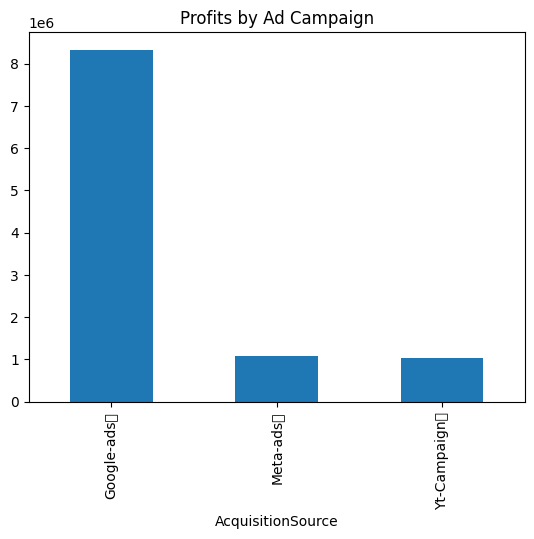

In [78]:
##Profits by ad campaign source
df['Profit']=(df['ProductPrice']-df['ProductCost'])*df['OrderQuantity']
profits_ads=df.groupby('AcquisitionSource')['Profit'].sum().sort_values(ascending=False)
profits_ads.plot(kind='bar')
plt.title('Profits by Ad Campaign')

Text(0.5, 1.0, 'Per User Profitablity')

) missing from current font.packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


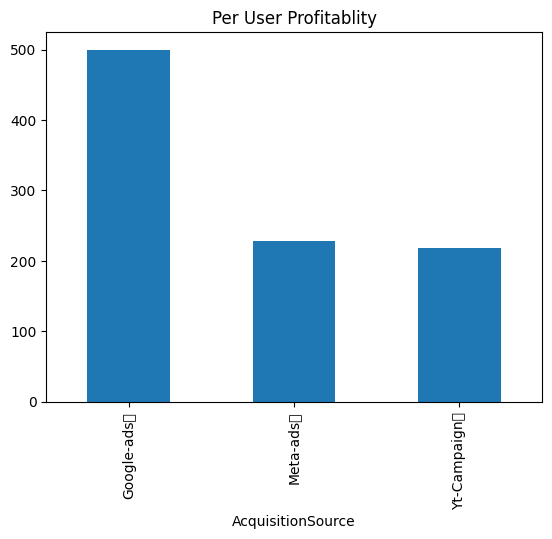

In [79]:
##Per-user profitablity by ad campaign
gr_ads_cust=df.groupby(['AcquisitionSource','CustID']).size()
gr_ads_cust_profit=df.groupby(['AcquisitionSource','CustID'])['Profit'].sum().reset_index()
gr_ads_cust_profit
unique_users_per_campaign=df.groupby('AcquisitionSource')['CustID'].nunique()
per_user_profitablity=profits_ads/unique_users_per_campaign
per_user_profitablity.plot(kind='bar')
plt.title('Per User Profitablity')

Text(0.5, 1.0, 'Avearge Max Profit')

) missing from current font.packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


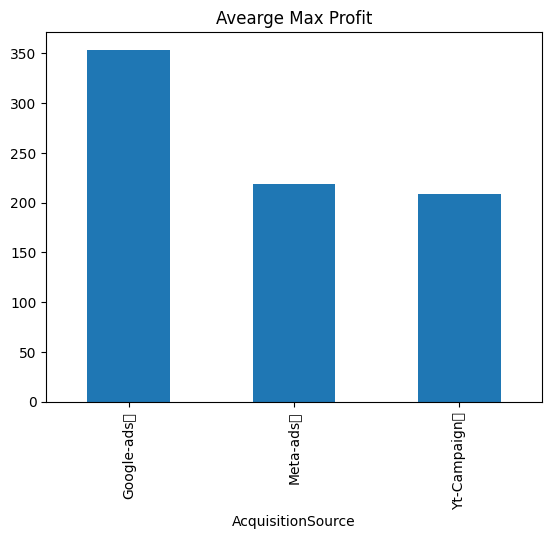

In [80]:
##Average max profit per user per adsource
max_profit_per_user=df.groupby(['AcquisitionSource','CustID'])['Profit'].max().reset_index()
avg_max_profit=max_profit_per_user.groupby('AcquisitionSource')['Profit'].mean()
avg_max_profit.plot(kind='bar')
plt.title('Avearge Max Profit')

Text(0.5, 1.0, 'Median Max Profit')

) missing from current font.packages\IPython\core\events.py:89: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


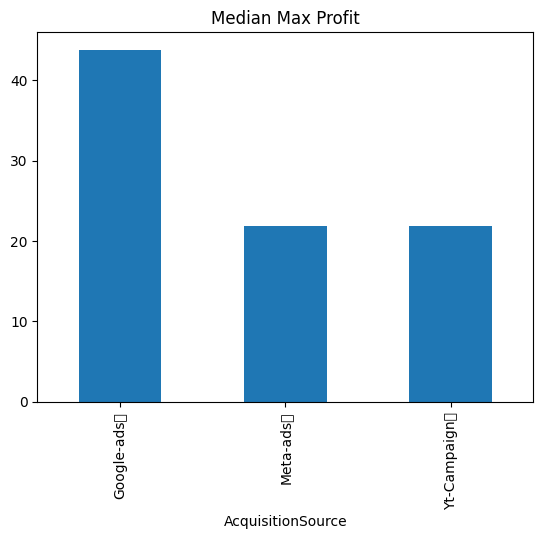

In [85]:
##Median max profit per user
median_max_profit=max_profit_per_user.groupby('AcquisitionSource')['Profit'].median()
median_max_profit.plot(kind='bar')
plt.title('Median Max Profit')

# Conclusion
### Google-ads campaign seems better choice to focus as  single campaign source in current situation.It tops in total profits,profits per user,avearge and median maximum profits.